# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9          |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [35]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

In [9]:

df = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})


df

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

Text(0.5, 1.0, 'Scatter Plot')

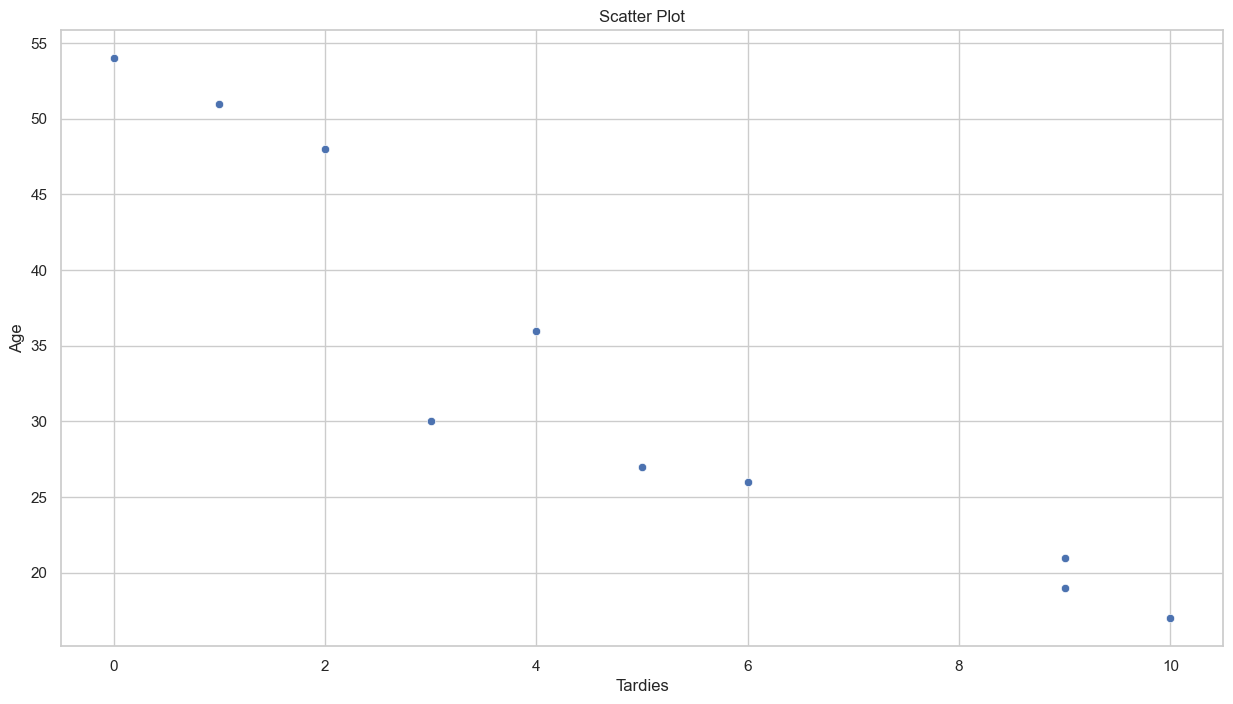

In [17]:
sns.scatterplot(x=df.Tardies, y=df.Age)
plt.title("Scatter Plot")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# People below 35 tend to be late, more than older people.
# That 54 years old never late is an outlier and so is the last dot 8-9 years old.
# As age increases the lateness reduces, negative relation ?

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

Covariance between Age and Tardies: -45.56666666666666
Correlation coefficient between Age and Tardies: -0.9391626886887121


"\n1- For what I finally understood, the covariance is negative cause they dont move together in the same \ndirection, meaning one increases and the other does not. \n\n2- The correlation normalizes the Covariance with values '1 and 1. as the correlation is -0.9,\nit means that is negative. aligns with the result in covariance\n"

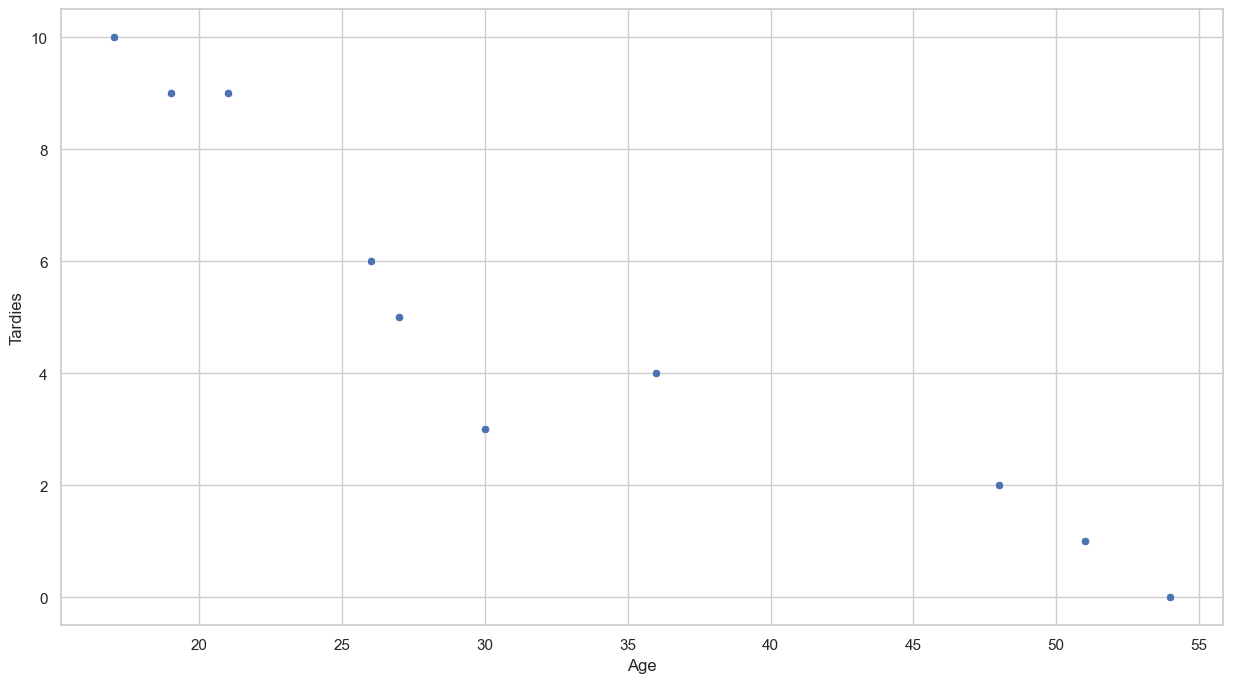

In [23]:
sns.scatterplot(x='Age', y='Tardies', data=df)

covariance_matrix = np.cov(df['Tardies'], df['Age'])

covariance = covariance_matrix[0, 1]

correlation_coefficient = np.corrcoef(df['Tardies'], df['Age'])[0, 1]

print(f'Covariance between Age and Tardies: {covariance}')
print(f'Correlation coefficient between Age and Tardies: {correlation_coefficient}')

"""
1- For what I finally understood, the covariance is negative cause they dont move together in the same 
direction, meaning one increases and the other does not. 

2- The correlation normalizes the Covariance with values -1 and 1. as the correlation is -0.9,
it means that is negative. aligns with the result in covariance
"""


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

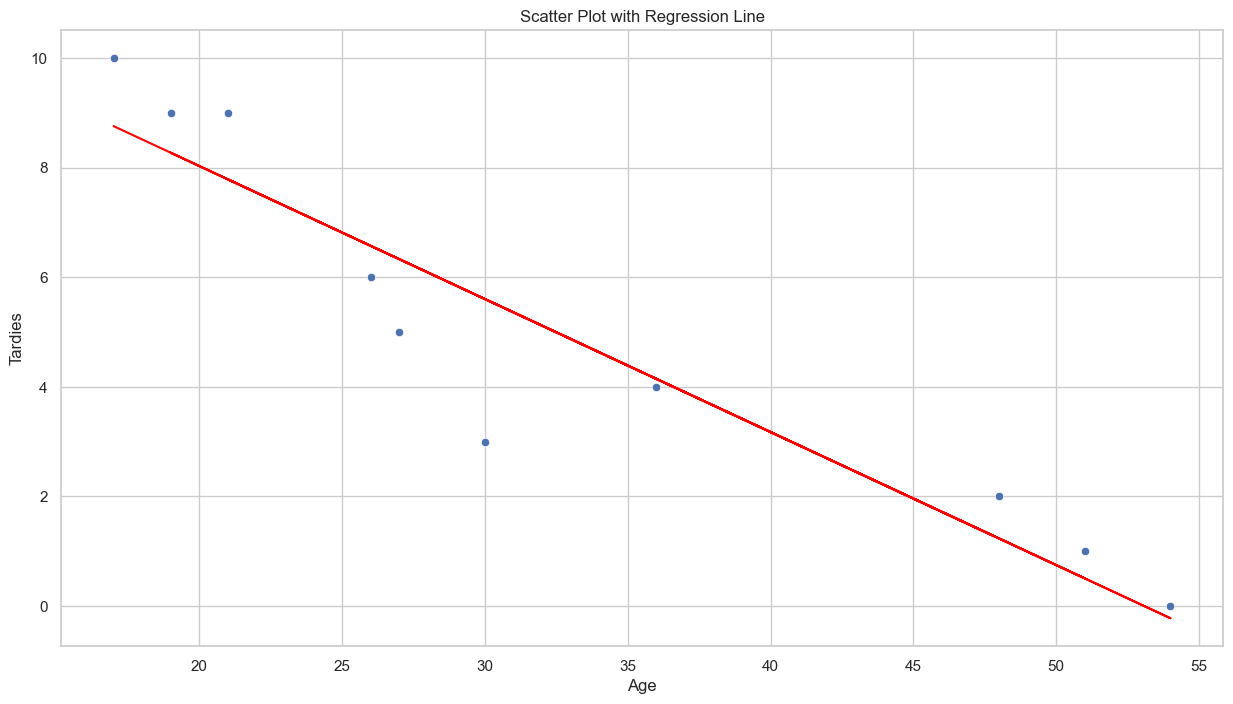

In [21]:
X = df[['Age']]  
y = df['Tardies']  

model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)

sns.scatterplot(x='Age', y='Tardies', data=df)
plt.plot(df['Age'], predictions, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Scatter Plot with Regression Line');

"""
The dependt variable here is "Tardies", the independent one is "Age", 
we just have a single variable so we used singular lineal regression.

Finally understood that the line is not necessarely equally far from each point, the regression model
just tries to minimizes the sum of the squared differences, to minimize the over all error and predict.

Conclusion: Age is related to being late with the given dataframe, 

"""

Plot your regression model on your scatter plot.

In [ ]:
# Your code here.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [26]:
df = pd.read_csv(r"C:\Users\ateso\Desktop\Ironhack\lab-regression-analysis\vehicles.csv")


df.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [33]:
data = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

correlations = data.corr()

"""
If we refer back to the previously mentioned correlations -1 and 1 being the most importants, from here we can get
positives and negatives.

Variables with a high positive correlation are more important in determining CO2 emissions

Conclusion:  the closer to 0 they are the less impact or irrelevant they are, "Year" at 0.22.
"""
correlations

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [37]:
X = data.drop('CO2 Emission Grams/Mile', axis=1)
y = data['CO2 Emission Grams/Mile']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('MSE:', mse)
print('R2:', r2)

"""
With this model I separated the dependent and independent variables, added a constant term to the independent
one, used train_test_split to split the data in 0.2 and random_s = 42.

with model.fit() i was able to fit the model to the training data.

for y_predict = model.predict() function.
for mse used = mean_squared_error() function.
for r2 = r2_score() function.

The model is using a multiple Linear regresion

"""

Coefficients: [-0.31558675  1.79402632 19.23102729 -2.9335732   0.03197145]
Intercept: 755.6935073143708
MSE: 289.82774408137766
R2: 0.9794542628636334


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
"""
Year -0.31558675 : as the year increases the CO2 decrease.

Cylinders 1.79402632 : the more cylinders the bigger the emissions.

Barrels per Year 19.23102729 : As the comsuption increases so does the emissions.

Combines MPG -2.9335732 : The more efficient the car, less MPG, less emissions.

Fuel per year 0.03197145: in a unrelated noticeable effect "not to be considered", 
but it suggests that the rise on prise also increses the emissions.

-----------------------------------------------------------------------------------------

Intercept 755.6935073143708 : the baseline for C02.

MSE: 289.82774408137766 : Mean Squared Error, the lower the better, the more accuaratelly it predicts
"this is too high i think".

R2 0.9794542628636334 : it represent a 97.9% of the varience explained, might be a good model or fit model.
this is the dependent proportion explained by the independent variables.

"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [39]:
data = {'X': [1, 3, 4, 6, 8, 9, 11, 14],
        'Y': [1, 2, 4, 4, 5, 7, 8, 13]}

df = pd.DataFrame(data)

df.head(2)

,X,Y
0,1,1
1,3,2


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<Axes: title={'center': 'Attendace level'}, xlabel='X', ylabel='Y'>

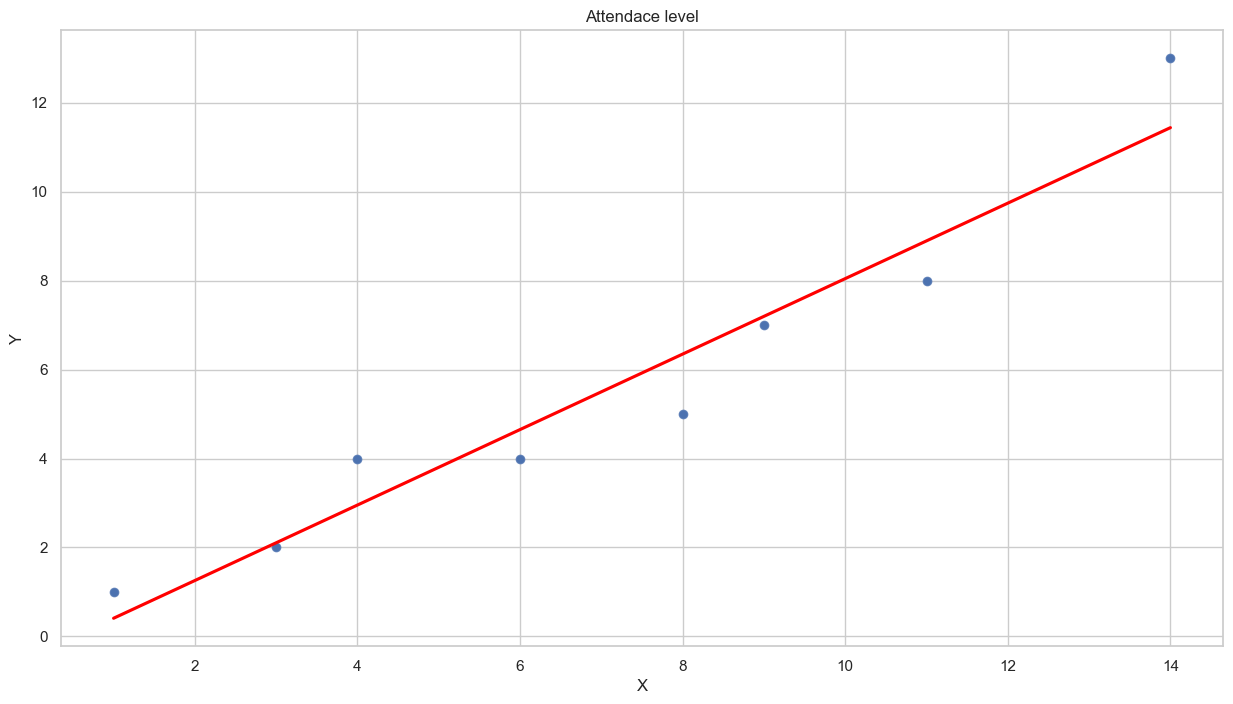

In [43]:
sns.scatterplot(x=df.X, y=df.Y)
plt.title ("Attendace level")
sns.regplot(x=df["X"], y=df["Y"], ci=None, line_kws={"color":"red"})


#X : Invited
#Y : Attended

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# The more people we invite the more attend, positive relationship.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

<Axes: xlabel='X', ylabel='Y'>

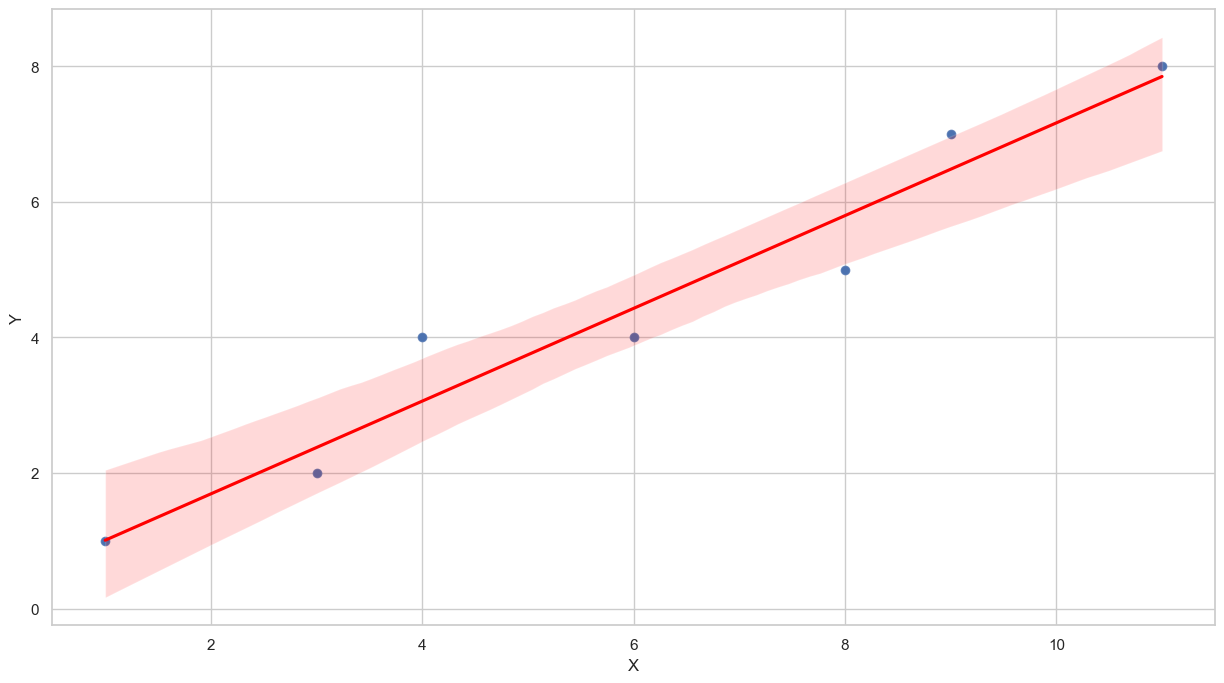

In [48]:
# I can see i point in Y12, i suppose is the outlier, we will create a limit of 12
df_no_outliers = df[df["Y"] <= 12]
sns.scatterplot(x="X", y="Y", data=df_no_outliers)
sns.regplot(x=df_no_outliers["X"], y=df_no_outliers["Y"], line_kws={"color":"red"})



What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# The second plot is more accurate and the first one with outliers, so it is less influenced by outliers.

"""
 The line slope has moved due to the removal of the outlier and the representation is more accurate, 
outliers are considered errors.

"""
